In [1]:
import pandas as pd
import numpy as np
import glob,os
from glob import iglob
#import scanpy as sc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import time
from scipy.io import mmread
from scipy.io import mmwrite
import random
from scipy.sparse import csr_matrix

# single cell sle part

In [6]:
path = '../GSE135779_SLE/test/aHD/'
file = glob.glob(os.path.join(path, "*.csv.gz"))
hd = []
for f in file:
    hd.append(pd.read_csv(f,index_col=0).T)
for i in range(len(hd)):
    hd[i]['patient']='0'

In [7]:
path = '../GSE135779_SLE/test/cHD/'
file = glob.glob(os.path.join(path, "*.csv.gz"))
chd = []
for f in file:
    chd.append(pd.read_csv(f,index_col=0).T)
for i in range(len(chd)):
    chd[i]['patient']='0'

In [8]:
#"['IGJ', 'TMEM2', 'TMEM66', 'GPX1', 'FYB'] not in index"
hd_m=hd[0]
for i in range(1,len(hd)):
    hd_m=pd.concat([hd_m,hd[i]],axis=0)


In [9]:
#"['IGJ', 'TMEM2', 'TMEM66', 'GPX1', 'FYB'] not in index"
chd_m=chd[0]
for i in range(1,len(chd)):
    chd_m=pd.concat([chd_m,chd[i]],axis=0)


In [5]:
path = '../GSE135779_SLE/test/aSLE/'
file = glob.glob(os.path.join(path, "*.csv.gz"))
asle = []
for f in file:
    asle.append(pd.read_csv(f,index_col=0).T)
for i in range(len(asle)):
    asle[i]['patient']='1'
asle_m=asle[0]
for i in range(1,len(asle)):
    asle_m=pd.concat([asle_m,asle[i]],axis=0)


In [3]:
path = '../GSE135779_SLE/test/cSLE/'
file = glob.glob(os.path.join(path, "*.csv.gz"))
csle = []
for f in file:
    csle.append(pd.read_csv(f,index_col=0).T)
for i in range(len(csle)):
    csle[i]['patient']='1'
csle_m=csle[0]
for i in range(1,len(csle)):
    csle_m=pd.concat([csle_m,csle[i]],axis=0)


In [25]:
features=pd.read_csv('../three_gene_combined_markerset.csv',index_col=1)
features=np.append(features.index.values,'patient')
features
features=np.delete(features,[9,11,12,13,14])
df=pd.concat([hd_m.loc[:,features],csle_m.loc[:,features],
             chd_m.loc[:,features],asle_m.loc[:,features]
             ],axis=0)

array(['TCL1A', 'PPAPDC1B', 'FOS', 'CXCR4', 'SNX29P2', 'AIM2', 'CRIP1',
       'TNFRSF13B', 'ITGB1', 'IGHA1', 'ABCB4', 'IGHD', 'IGHM', 'PLPP5',
       'IGLC2', 'CD200', 'BACE2', 'IL4R', 'OSBPL10-AS1', 'CD27', 'HSPB1',
       'RGS2', 'MPP6', 'FCRL5', 'CIB1', 'S100A12', 'FOSB', 'S100A8',
       'RPS4Y1', 'IFI27', 'IFI44L', 'MX1', 'IFI44', 'ISG15', 'FCGR3A',
       'CDKN1C', 'RHOC', 'HES4', 'TCF7L2', 'MTRNR2L12', 'HLA-DQA2',
       'HIST1H1E', 'H1F0', 'PLCG2', 'C15orf48', 'IL1B', 'CCL4', 'THBS1',
       'CCL4L2', 'XIST', 'HBEGF', 'NR4A2', 'TMEM176A', 'TNF', 'CCL3L1',
       'IL1R2', 'CD163', 'FKBP5', 'RETN', 'SAP30', 'C1QA', 'C1QB', 'IL7R',
       'LTB', 'CD3D', 'TCF7', 'CD3G', 'ICAM1', 'ICAM2', 'ITGAL', 'SPN',
       'ITGAX', 'ITGAM', 'APP', 'CD74', 'CD47', 'CD36', 'IL16',
       'TNFRSF1A', 'TGFB1', 'TGFBR2', 'SORT1', 'BAG6', 'patient'],
      dtype=object)

0.6849451949276053 191
Running time: 1233.1357340812683 Seconds


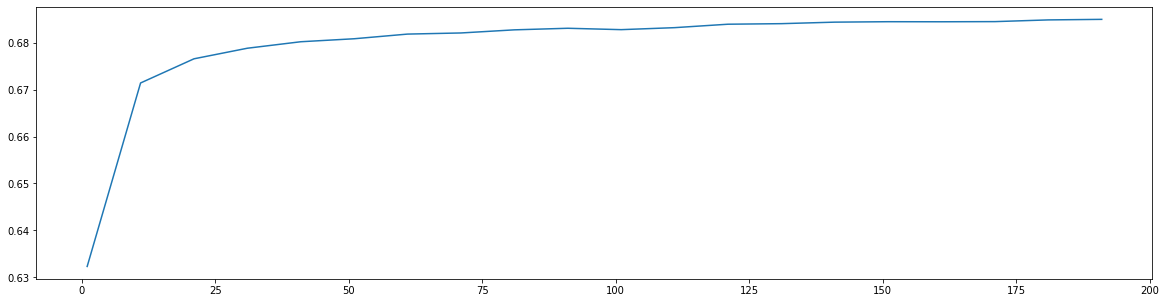

In [31]:
data=df.drop(columns=['patient'])
start=time.time()
scorel = []
for i in range(0,200,10): # 迭代建立包含0-200棵决策树的RF模型进行对比
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1,random_state=0)
    score = cross_val_score(rfc,data,label,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
end=time.time()
print('Running time: %s Seconds'%(end-start))
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

0.6851159538408398 185


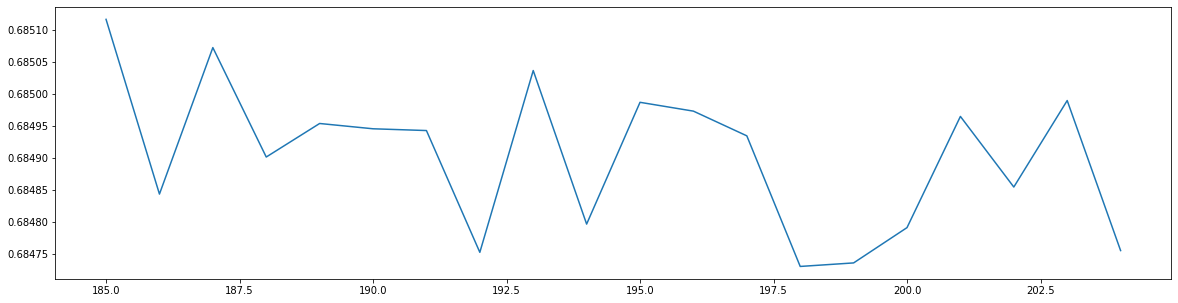

In [32]:
scorel = []
for i in range(185,205):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1,random_state=0)
    score = cross_val_score(rfc,data,label,cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(185,205)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(185,205),scorel)
plt.show()

Random Forest:0.7377736974982786


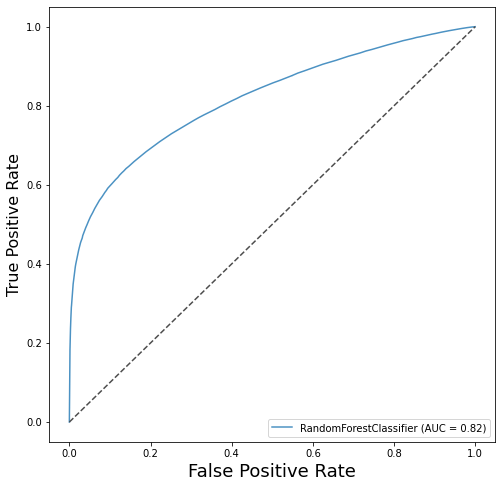

In [37]:
label=df.patient.values
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df.drop(columns=['patient']),label,test_size=0.3)
rfc = RandomForestClassifier(random_state=0,class_weight='balanced',n_estimators=185)
rfc = rfc.fit(Xtrain,Ytrain)
score_r = rfc.score(Xtest,Ytest)
c=pd.DataFrame(rfc.feature_importances_)
#a.index=df.columns.values
print("Random Forest:{}".format(score_r))
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, Xtest, Ytest, ax=ax, alpha=0.8)
plt.legend(loc=4,prop={'size': 10})
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=16)
ax.plot([0, 1], [0, 1], ls="--", c=".3")
plt.show()